## The code following is refered from [morvan's tutorial of pytorch](https://morvanzhou.github.io/tutorials/machine-learning/torch/2-03-activation/)
Additionally, I added some comments of my own to these codes while learning them.

## 1. Activation Function

In [6]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.linspace(-5,5,200)
x = Variable(x)
# print x

In [7]:
x_np = x.data.numpy()
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

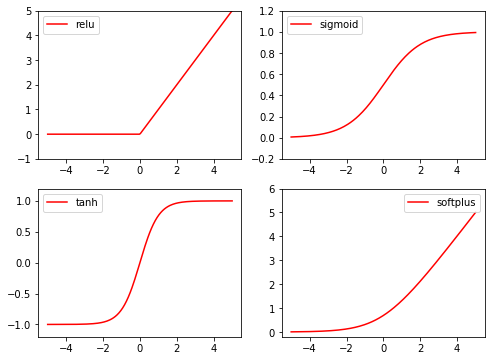

In [8]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## 2. Regression

In [ ]:
%reset
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # insert the dimension which is 1 to certain position to the tensor
y = x.pow(2) + 0.2*torch.rand(x.size())

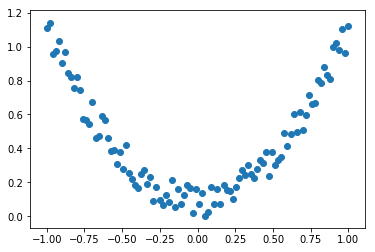

In [22]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 定义 Net

In [34]:
import torch.nn.functional as F
class Net(torch.nn.Module): # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__() # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x): 
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)
# 输入层1个，隐藏层十个， 输出层1个
# print(net)

### 开始训练

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # lr是学习率
loss_func = torch.nn.MSELoss() # 均方误差公式

for t in range(100):
    prediction = net(x) # 输出Net的预测值
    loss = loss_func(prediction, y) # 计算误差
    
    optimizer.zero_grad() # 清空上一步残留的更新参数
    loss.backward() # 反向传播
    optimizer.step() # 更新参数到net上
        
    # 可视化结果
    if t % 5 ==0:
        plt.cla() # Clear the current axes.
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) # lw = width
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

## 3. Classification

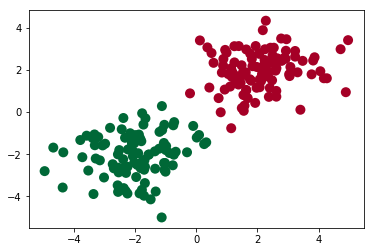

In [52]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100) # 这组数据的label
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

# 合并数据
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) #dimension代表沿什么维连接张量序列
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建立网络

In [61]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

### 训练

In [ ]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值
    
    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), dim=1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

## 4. Fast Build

Let's review the above network:

In [87]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net1 = Net(1, 10, 1)   # 这是我们用这种方式搭建的 net1

The network we mentioned above can be implemented in a faster way:

In [89]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

Let's compare these two networks:

In [90]:
print(net1)

print(net2)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


This means that net2 incorporates ReLU layer into the building.

If we do not need to DIY network, the second way is faster.

## 5. Store the network

In [117]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)


def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      

### Restore the whole network

In [124]:
def restore_net():
    # restore the entire net1 to  net2
    net2 = torch.load('./net.pkl')
    prediction = net2(x)
    return prediction

### Restore the network based on parameters

In [125]:
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('./net_params.pkl'))
    prediction = net3(x)
    return prediction

### Show me the result

In [ ]:
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# We have 2 ways to save the network:
torch.save(net1, './net.pkl')  # 保存整个网络
torch.save(net1.state_dict(), './net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)

# 提取整个网络
prediction2 = restore_net()

# 提取网络参数, 复制到新网络
prediction3 = restore_params()

I have no idea why the second saving way does not work in IPython.

In [ ]:
prediction1 = net1(x)

plt.figure(1, figsize=(8, 6))
plt.subplot(131)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction1.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})

plt.subplot(132)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction2.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})

plt.subplot(133)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction3.data.numpy(), 'r-', lw=5)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})


Ok, at least the first saving way works.

## 6. Batch Training

In [8]:
import torch.utils.data as Data
torch.manual_seed(1) # reproducible

BATCH_SIZE = 5
x = torch.linspace(1,10,10)
y = torch.linspace(10,1,10)

# convert to dataset
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)

# put torch_dataset to DataLoader
loader = Data.DataLoader(
    dataset = torch_dataset, #数据集大小
    batch_size = BATCH_SIZE, #批大小
    shuffle = True, # 打乱数据
    num_workers = 2, # 多线程
)

for epoch in range(3): # 训练所有！整套！数据三次
    for step, (batch_x, batch_y) in enumerate(loader): # 每一步释放一批量数据
        # the code for training
        print('Epoch: ', epoch, "| Step: ", step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 5.  7. 10.  3.  4.] | batch y:  [6. 4. 1. 8. 7.]
Epoch:  0 | Step:  1 | batch x:  [2. 1. 8. 9. 6.] | batch y:  [ 9. 10.  3.  2.  5.]
Epoch:  1 | Step:  0 | batch x:  [ 4.  6.  7. 10.  8.] | batch y:  [7. 5. 4. 1. 3.]
Epoch:  1 | Step:  1 | batch x:  [5. 3. 2. 1. 9.] | batch y:  [ 6.  8.  9. 10.  2.]
Epoch:  2 | Step:  0 | batch x:  [ 4.  2.  5.  6. 10.] | batch y:  [7. 9. 6. 5. 1.]
Epoch:  2 | Step:  1 | batch x:  [3. 9. 1. 8. 7.] | batch y:  [ 8.  2. 10.  3.  4.]


## 7. Optimizer

- SGD is to use continuous small number of training samples to train.


- Momentum is to combine the gradient history with current gradient, using a certain weight.


- AdaGrad is to differentiate the learning rate of different dimensions using second moment (二次矩估计).


- RMSProp is to combine the estimation of variance with the history variance.


- Adam combines the estimation of first moment with the history first moment, based on RMSProp. Also, the deviation of the esimation of first moment and second moment is corrected.

Please check *Deep Learning* to  know more about gradient methods.

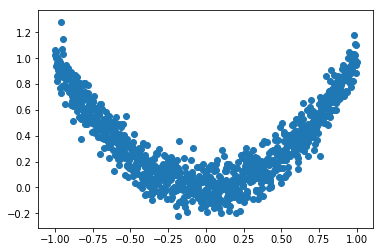

In [18]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1) # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size())) # what does this multiplier mean?

# plot it!
plt.scatter(x.numpy(), y.numpy())
plt.show()

# use data loader
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(
    dataset = torch_dataset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2,
)

In [43]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20,1)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
# create net for every Optimizer
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [44]:
# different optimizers
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam  = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

Ok, now let's train based on different training policies.

In [ ]:
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x) # please wrap it using Variable!!
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

Let's visualize the training loss.

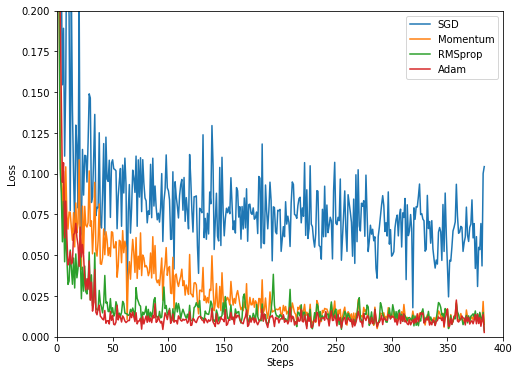

In [60]:
x = range(len(losses_his[0]))
# SGD, Momentum, RMSprop, Adam
plt.figure(1, figsize=(8, 6))
plt.plot(x, losses_his[0], label='SGD')
plt.plot(x, losses_his[1], label='Momentum')
plt.plot(x, losses_his[2], label='RMSprop')
plt.plot(x, losses_his[3], label='Adam')
plt.legend(loc='upper right')
plt.ylim((0, 0.20))
plt.xlim((0, 400))
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()

We can see that RMSprop is faster than Adam.

This means that we have to use different strategy according tot the mission.

## 8. CNN

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

torch.manual_seed(1)

# HYPER Parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='../mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

In [117]:
# 批训练50 samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_data = torchvision.datasets.MNIST(root='../mnist/', train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

Now let's create a CNN.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels = 1,
                out_channels = 16,
                kernel_size = 5,
                stride = 1,
                padding = 2,  # to conserve the size, padding = (kernel_size-1)/2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        ) # outshape = 16*14*14
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2), # 32*14*14
            nn.ReLU(),
            nn.MaxPool2d(2), # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10) # 10 categories
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
    
cnn = CNN()
print(cnn) # net architecture

Now let's train CNN.

In [130]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)


plt.ion()
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0], '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

Please install sklearn for layer visualization
Epoch:  0 | train loss: 2.3065 | test accuracy: 0.09
Epoch:  0 | train loss: 0.9361 | test accuracy: 0.79
Epoch:  0 | train loss: 0.2173 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2917 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1262 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1369 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2618 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1646 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0791 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0615 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0512 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1879 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0335 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0551 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0310 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0189 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0529 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0261 | test accuracy: 0.97

Let's predict.

In [131]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


Hooray!

## 9. RNN for Classification

Let's us RNN to predict handwriting numbers.

In [135]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

torch.manual_seed(1)

# HYPER PARAMETERS
EPOCH = 1
BATCH_SIZE = 64
TIME_STEP = 28 # rnn 时间步数 / 图片高度
INPUT_SIZE = 28 # rnn 每步输入值 / 图片每行像素
LR = 0.01
DOWNLOAD_MNIST = False

# Mnist 手写数字
train_data = torchvision.datasets.MNIST(
    root='../mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,          # 没下载就下载, 下载了就不用再下了
)

In [136]:
test_data = torchvision.datasets.MNIST(root='../mnist/', train=False)

# 批训练 50samples, 1 channel, 28x28 (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

# 为了节约时间, 我们测试时只测试前2000个
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

Now let's create RNN.

In [137]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.LSTM(
            input_size = INPUT_SIZE,
            hidden_size = 64, # rnn hidden unit
            num_layers = 1, # no stacked LSTM
            batch_first = True, # input & output 会是以 batch size 为第一维度的特征集 e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(64,10)
        
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)   LSTM 有两个 hidden states, h_n 是分线, h_c 是主线
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None) # None 表示 hidden state用全0的state
        
        # 选取最后的r_out输出
        # 这里r_out[:, -1, :]的值也是h_n的值
        out = self.out(r_out[:, -1, :])
        return out

rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


Let's train it!

In [138]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28, 28))
        b_y = Variable(y)
        
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print('finish training!')

finish training!


In [143]:
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


## 10. RNN for Regression

We want to use sin to predict cosin.

In [10]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

# Hyper Parameters
TIME_STEP = 10
INPUT_SIZE = 1
LR = 0.02
DOWNLOAD_MNIST = False

In [157]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size = 1,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True,
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
        
#     def forward(self, x, h_state):
#         r_out, h_state = self.rnn(x, h_state)
#         r_out_reshaped = r_out.view(-1, HIDDEN_SIZE) # to 2D data
#         outs = self.out(r_out_reshaped)
#         outs = outs.view(-1, TIME_STEP, OUTPUT_SIZE)  # to 3D data

rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


Now let's train it.

In [ ]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

h_state = None # 初始Hidden state为 None

plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

for step in range(60):
    start, end = step * np.pi, (step+1)*np.pi
    # sin 预测 cos
    steps = np.linspace(start, end, 10, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    
    prediction, h_state = rnn(x, h_state) # rnn 对于每个 step 的 prediction, 还有最后一个 step 的 h_state
    # 下一步很重要！
    h_state = Variable(h_state.data) # 需要重新包装，因为h_state是一个Tensor
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # plotting
    plt.plot(steps, y_np.flatten(), 'r-') # flatten就是torch.stack
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

## 11. AutoEncoder

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

# 超参数
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
DOWNLOAD_MNIST = False   # 下过数据的话, 就可以设置成 False
N_TEST_IMG = 5          # 到时候显示 5张图片看效果

train_data = torchvision.datasets.MNIST(
    root='../mnist/',    # 保存或者提取位置
    train=True,  # this is training data
    transform=torchvision.transforms.ToTensor(),    # 转换 PIL.Image or numpy.ndarray 成
                                                    # torch.FloatTensor (C x H x W), 训练的时候 normalize 成 [0.0, 1.0] 区间
    download=DOWNLOAD_MNIST,
)

train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(), # 控制输出在像素范围以内
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
    
autoencoder = AutoEncoder()

Let's train it!

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28*28))
        b_y = Variable(x.view(-1, 28*28))
        b_label = Variable(y)
        encoded, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
        
        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            # plotting decoded image (second row)
            # initialize figure
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
            plt.ion()   # continuously plot
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); # plt.pause(0.05)
            plt.ioff()
            plt.show()

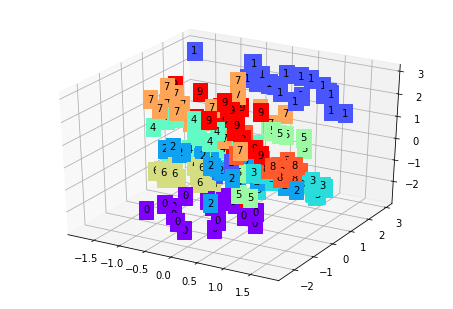

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# visualize in 3D plot
view_data = Variable(train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.)
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

## 12. Generative Adversarial Nets

In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible
np.random.seed(1)

# 超参数
BATCH_SIZE = 64
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 5             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 15     # it could be total point G can draw in the canvas
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

In [16]:
def artist_works(): # painting from the famous artist
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a-1)
    paintings = torch.from_numpy(paintings).float()
    return Variable(paintings)

In [20]:
G = nn.Sequential(
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),
)

D = nn.Sequential(
    nn.Linear(ART_COMPONENTS, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

Let's train it!

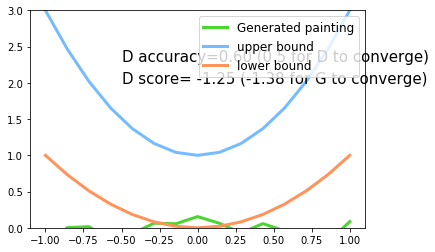

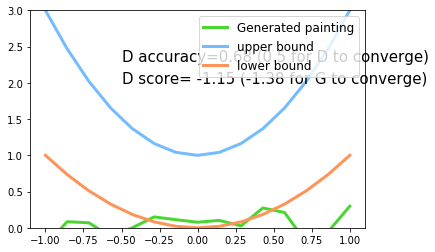

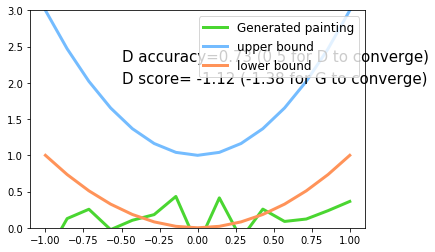

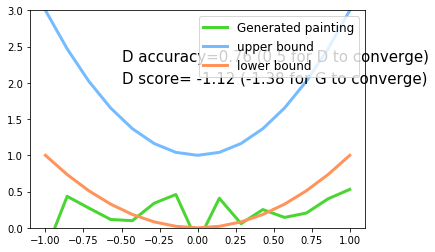

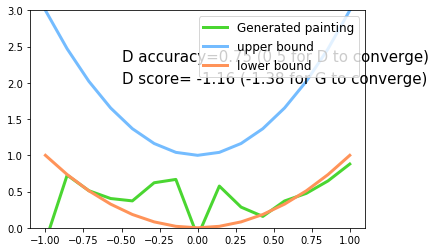

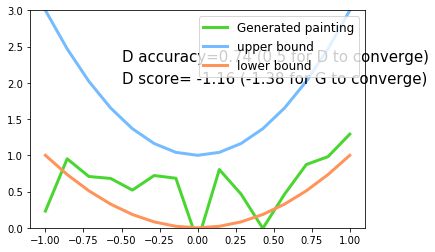

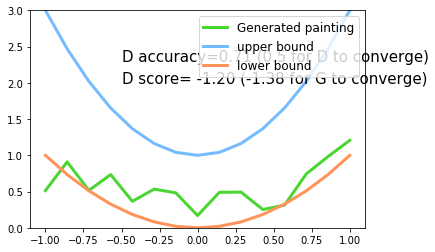

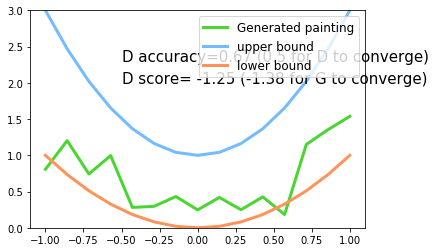

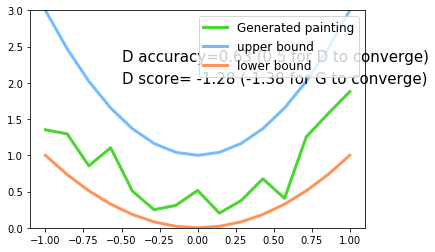

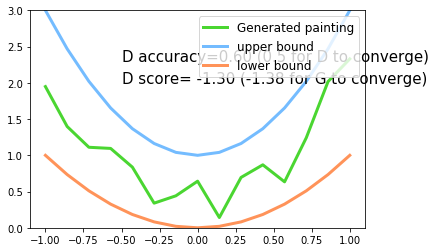

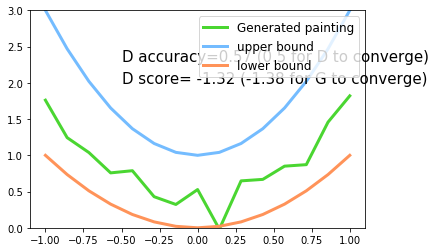

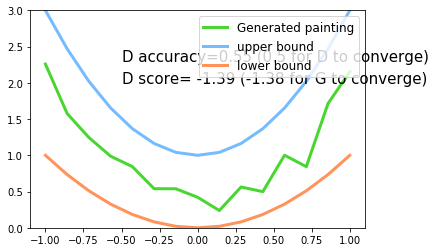

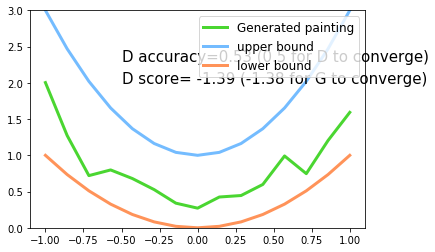

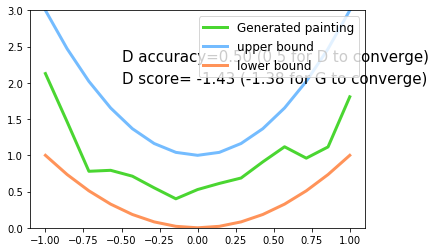

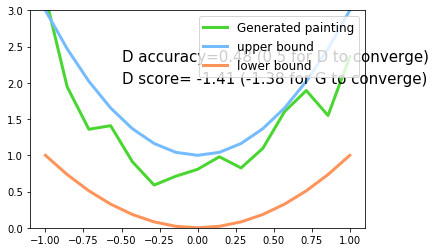

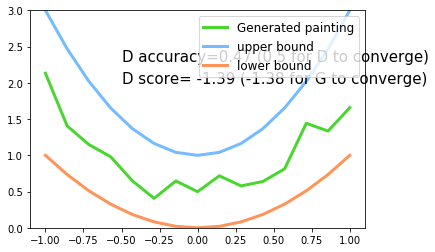

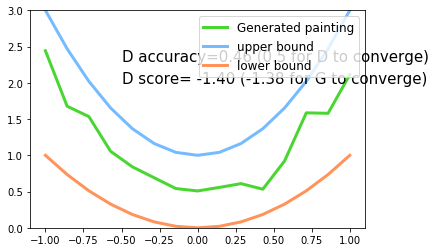

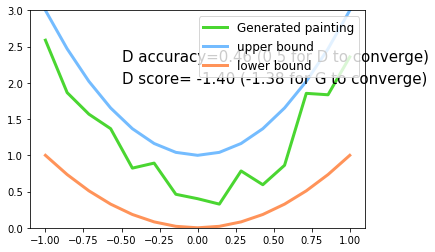

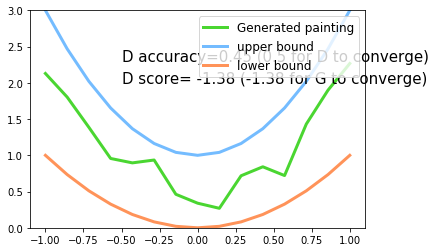

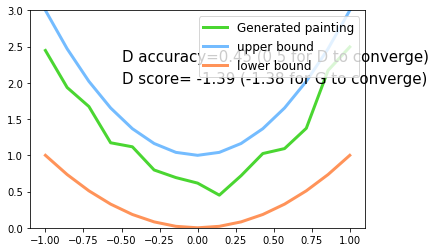

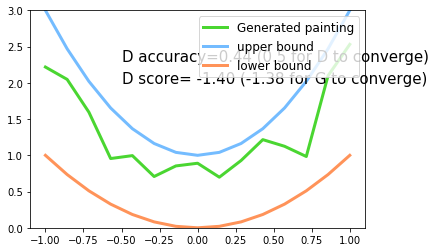

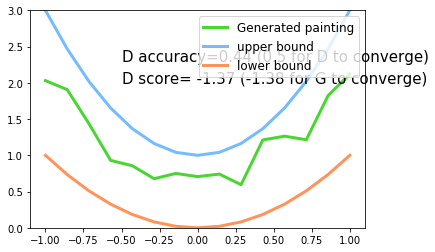

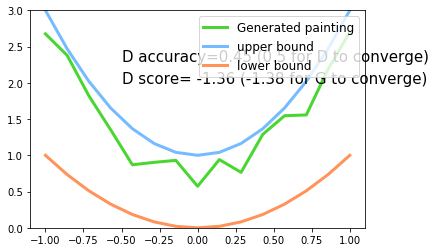

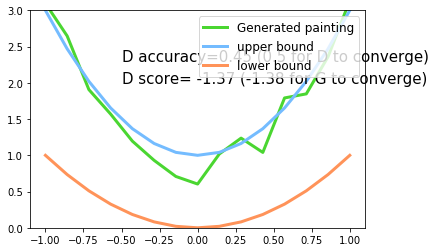

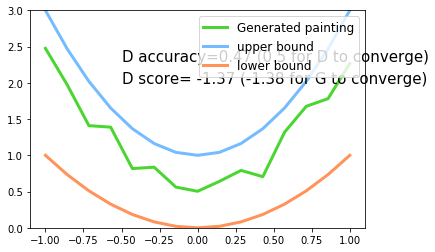

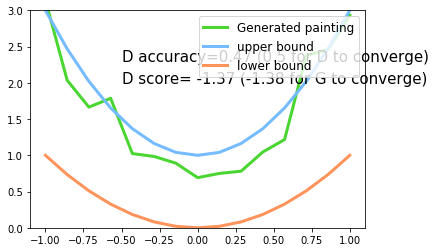

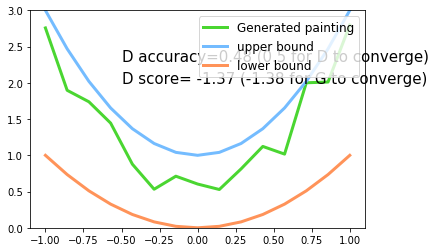

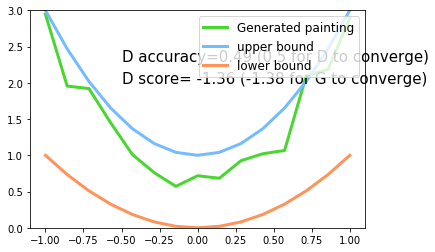

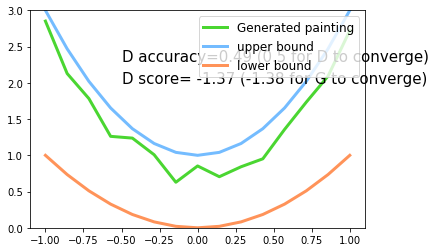

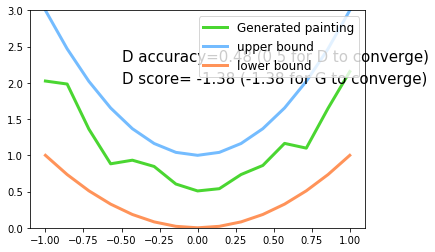

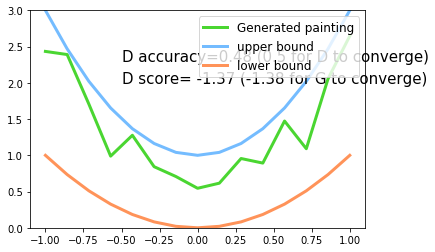

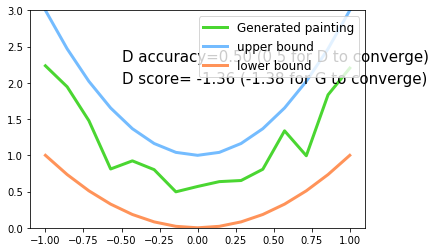

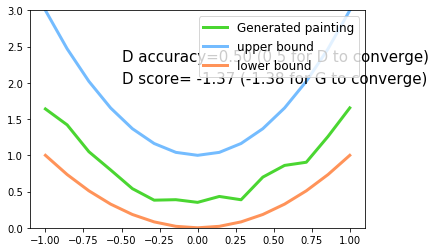

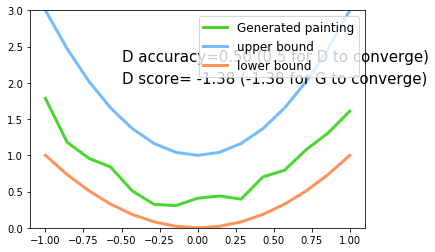

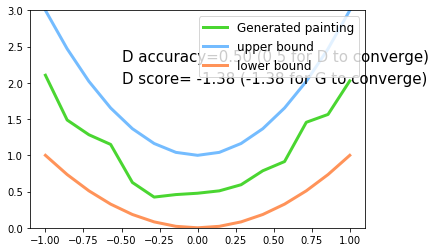

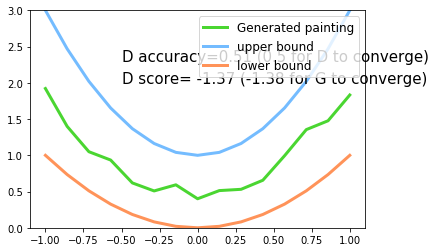

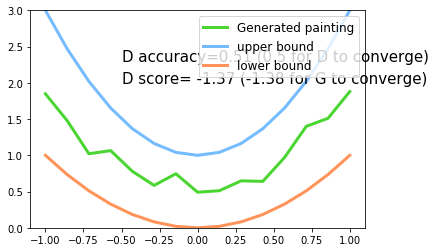

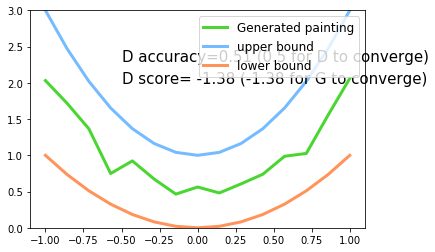

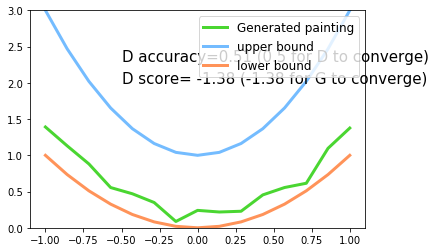

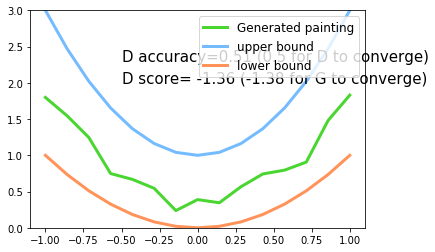

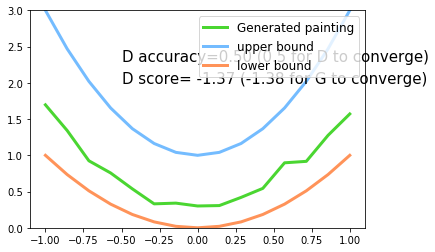

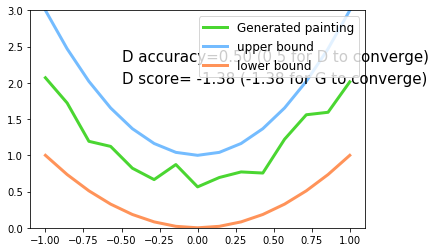

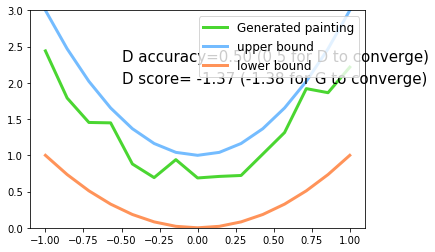

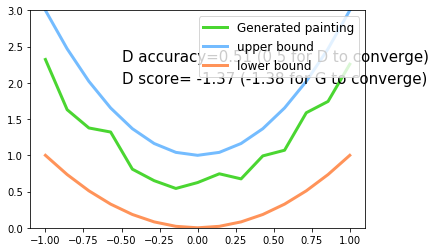

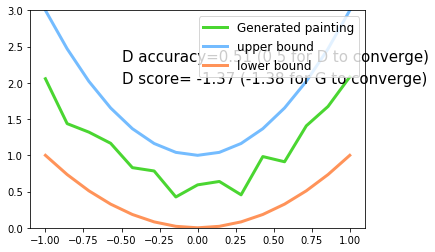

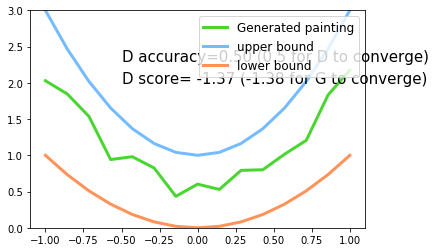

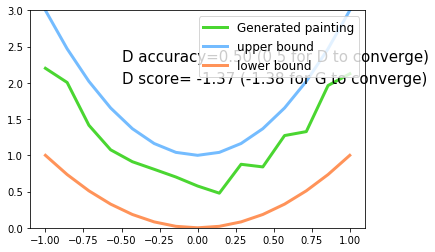

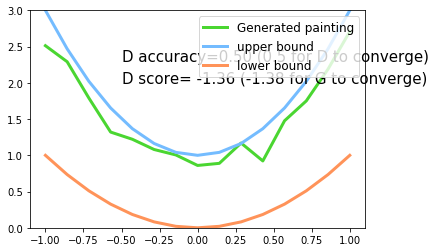

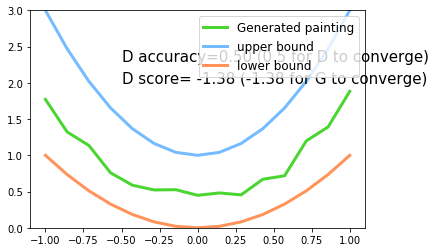

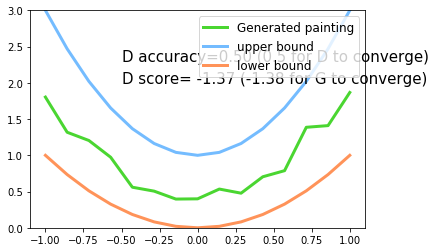

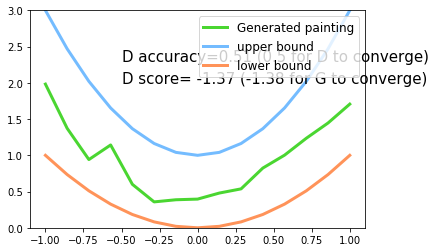

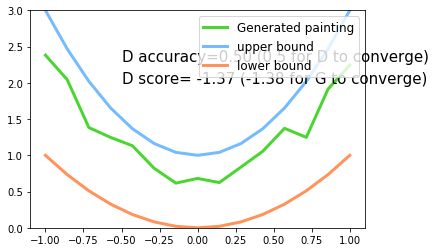

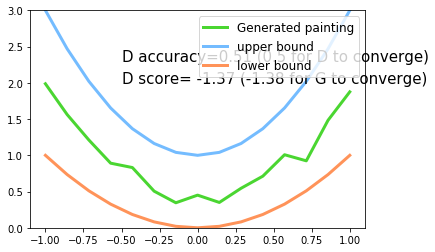

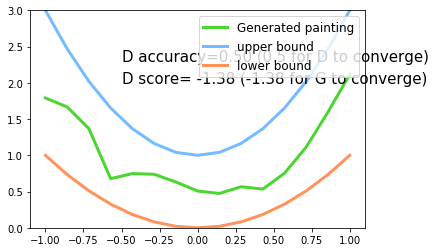

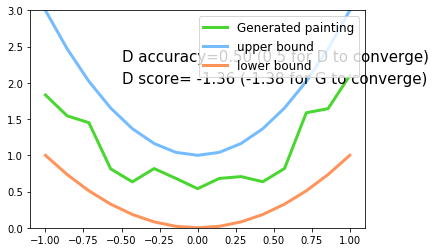

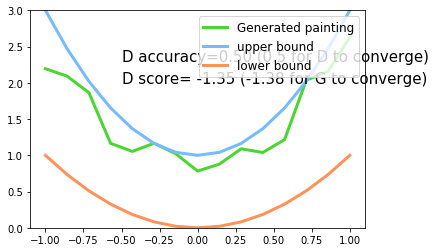

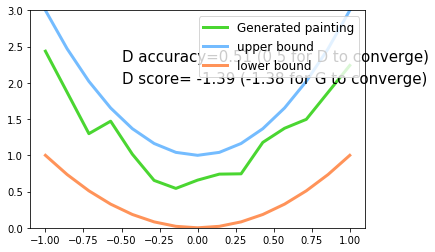

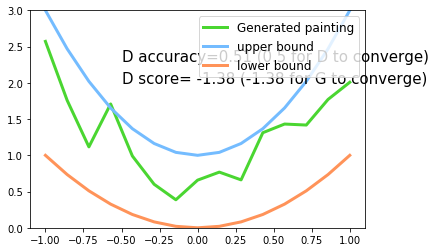

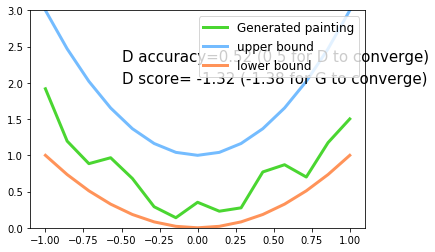

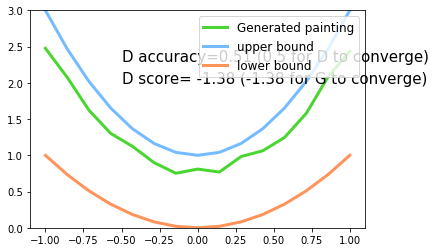

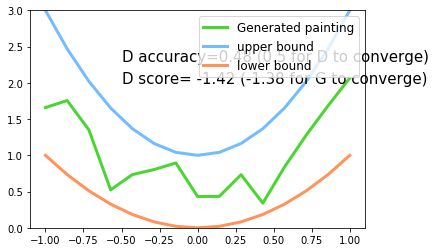

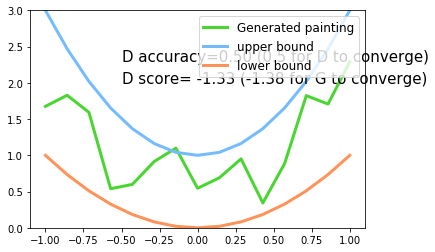

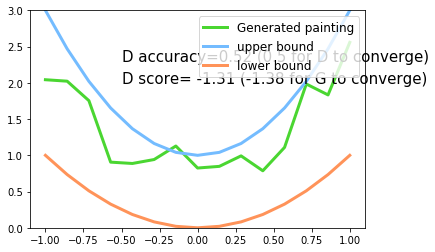

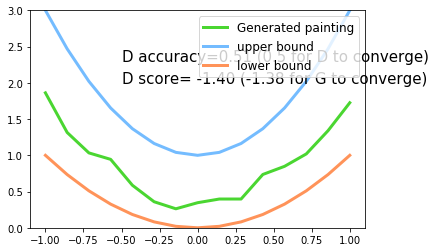

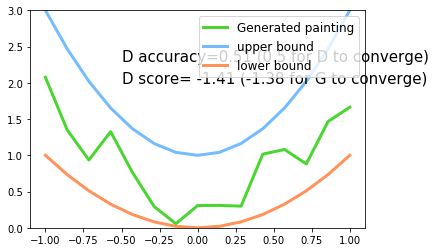

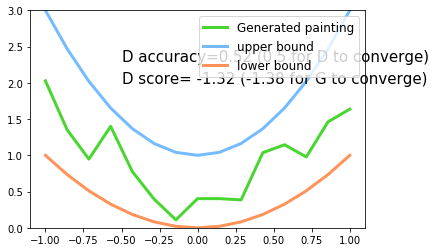

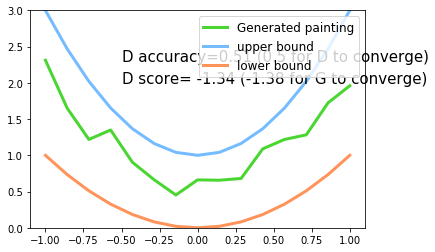

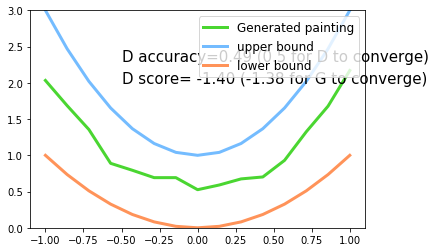

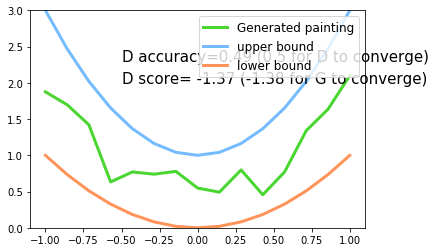

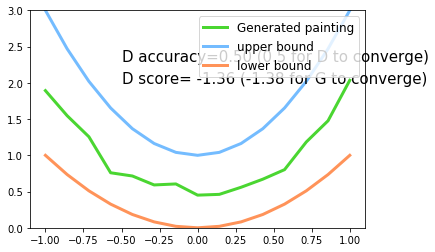

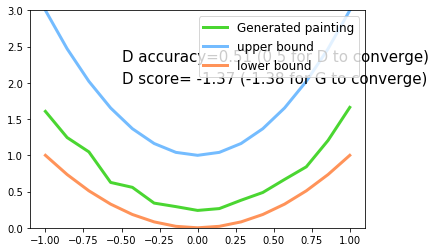

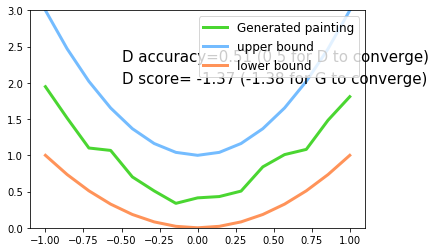

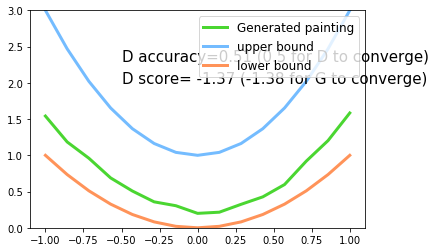

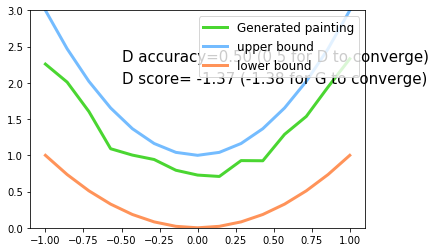

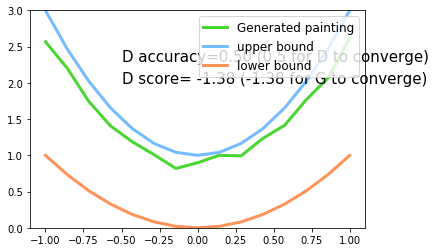

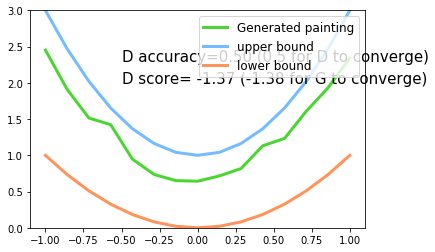

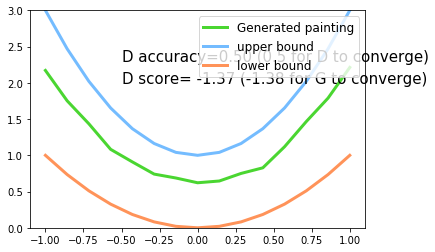

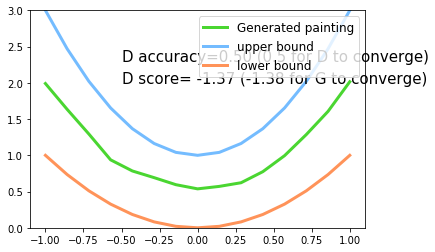

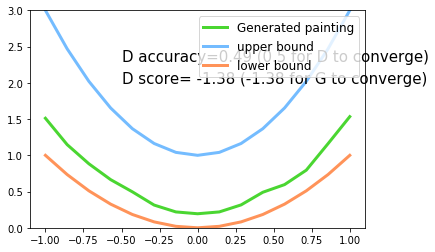

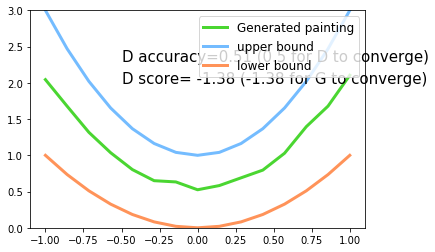

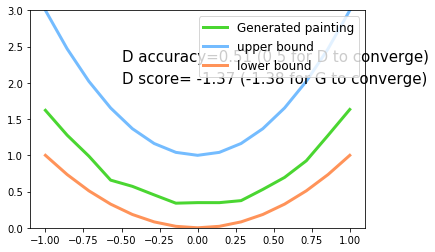

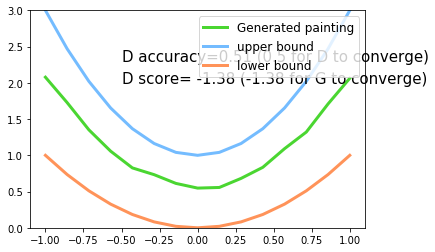

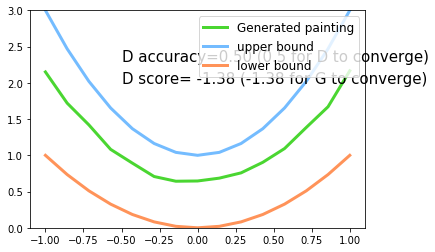

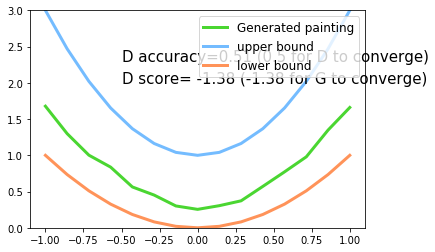

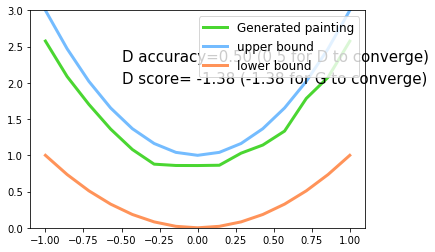

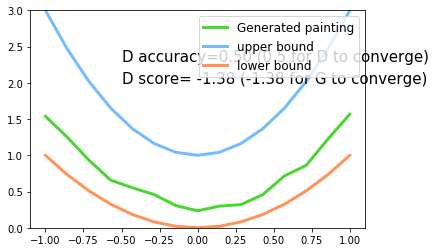

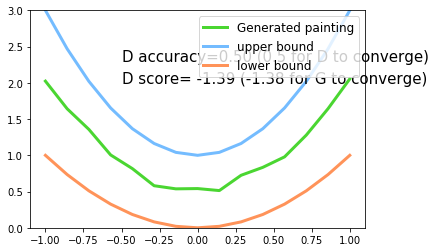

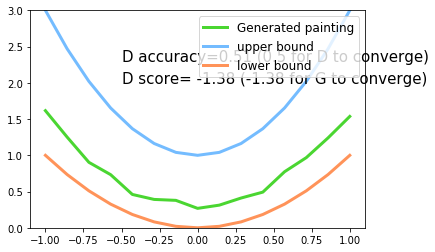

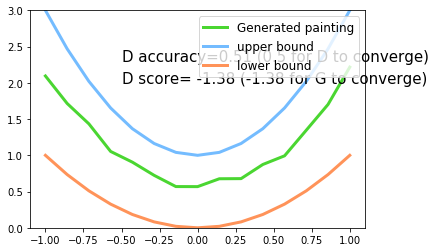

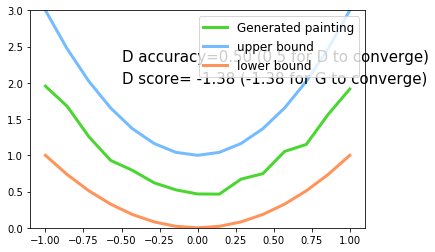

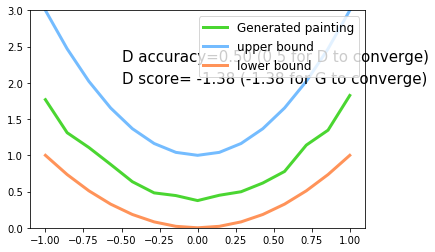

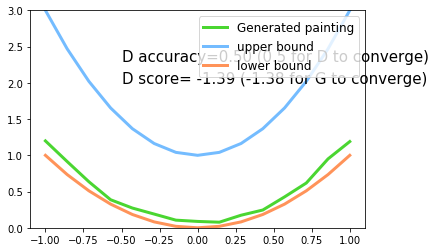

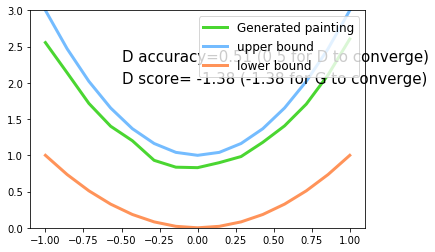

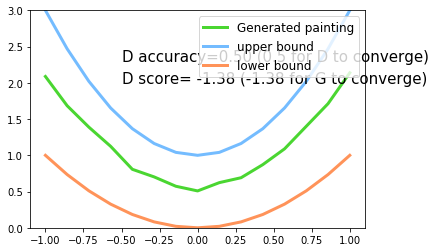

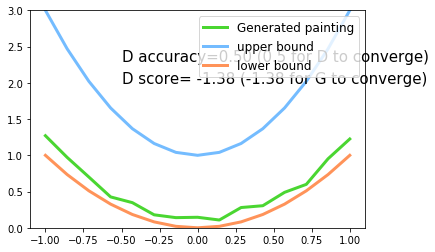

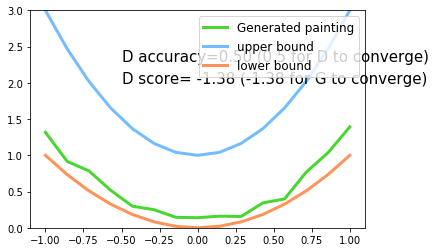

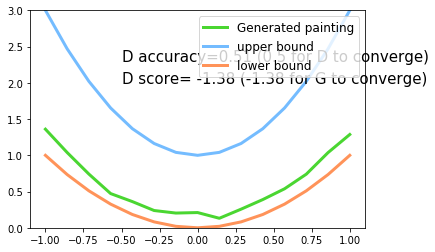

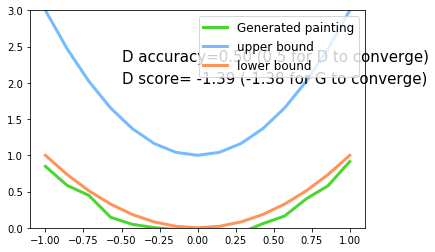

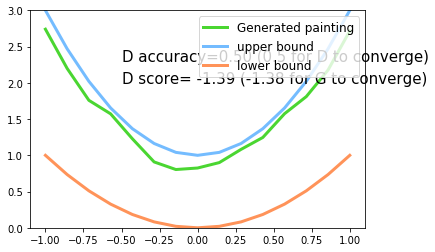

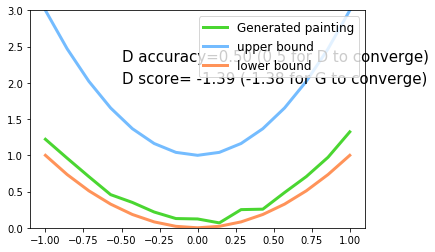

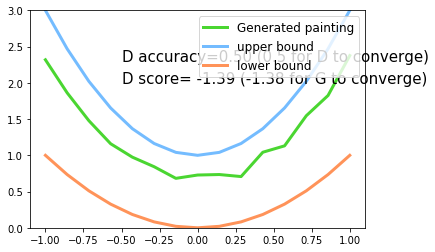

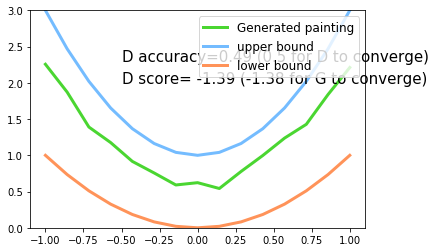

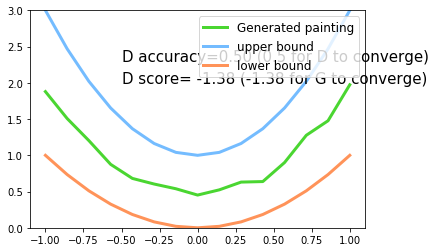

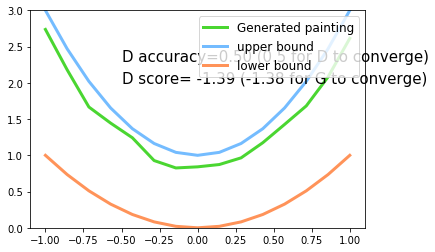

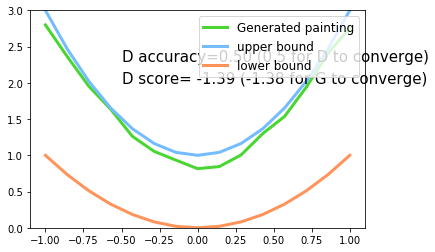

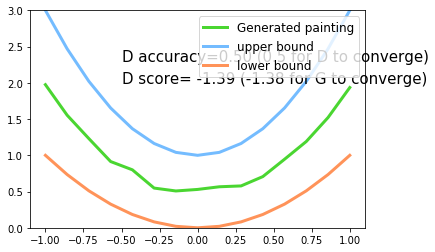

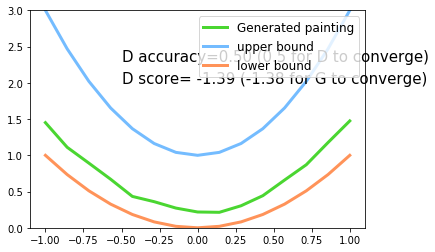

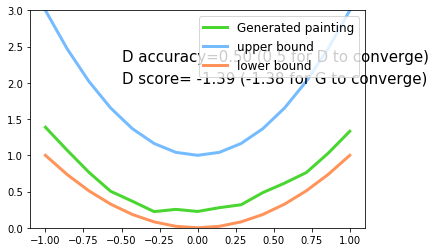

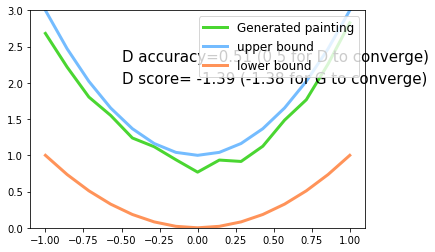

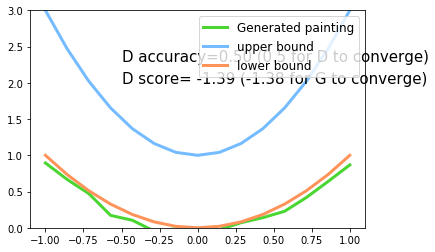

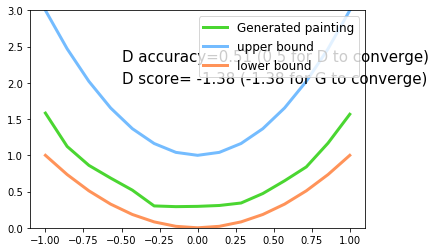

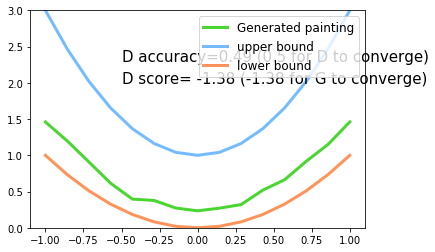

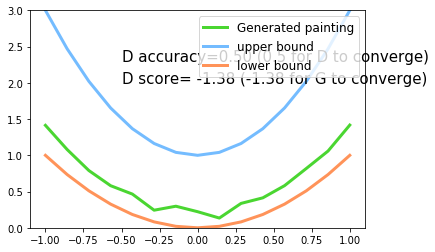

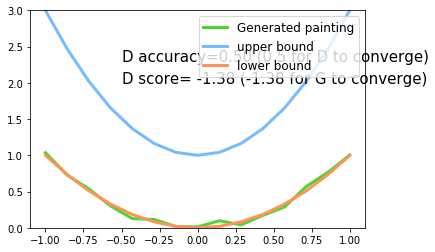

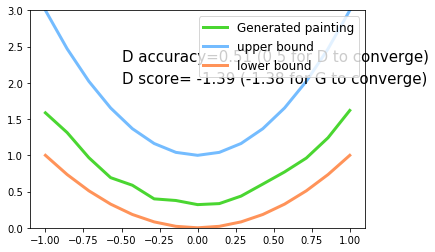

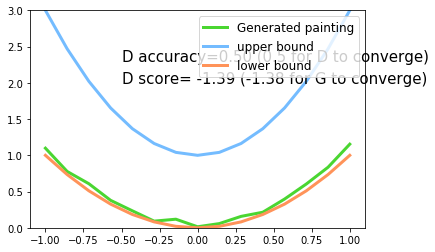

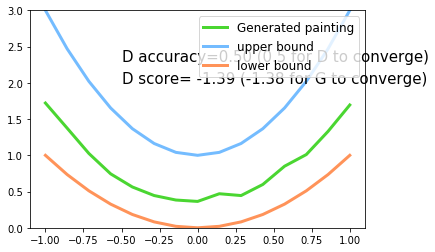

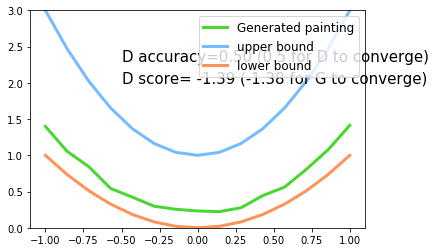

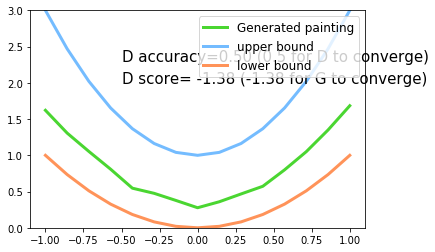

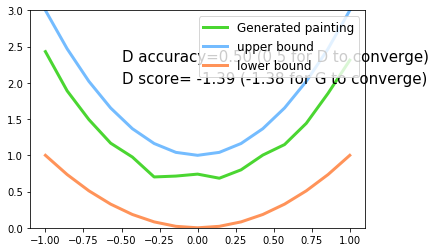

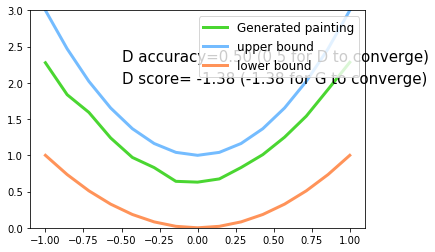

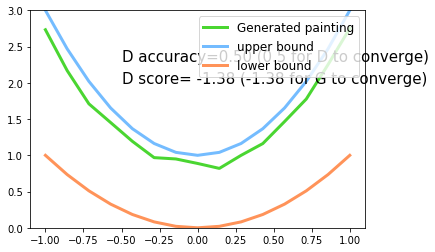

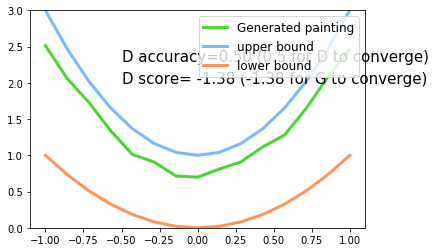

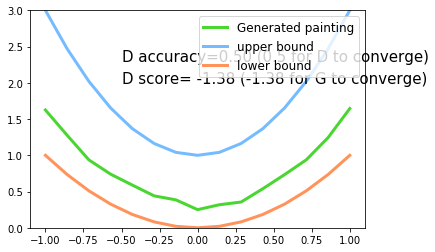

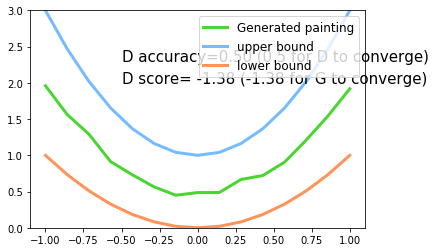

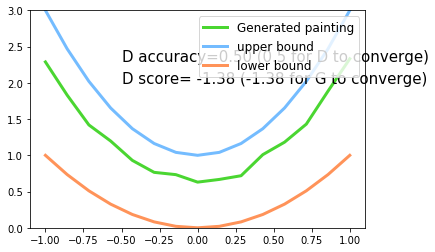

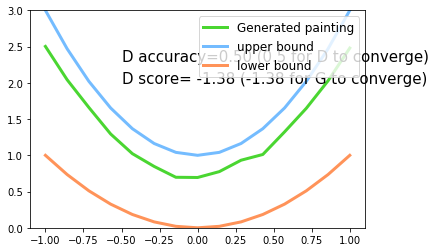

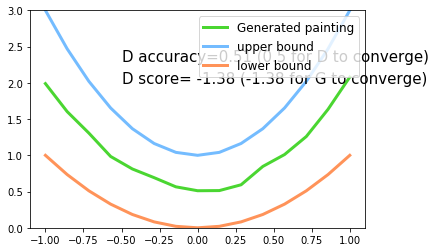

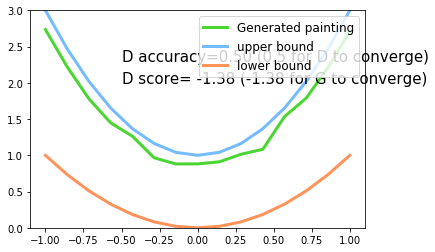

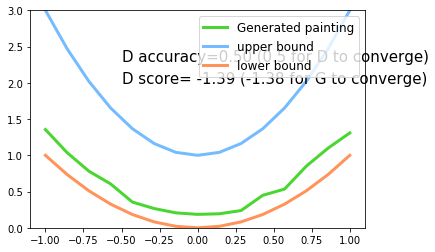

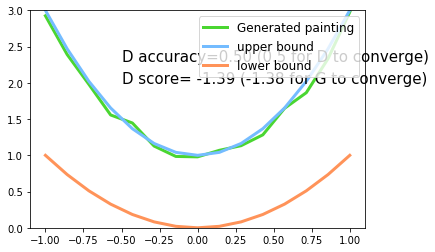

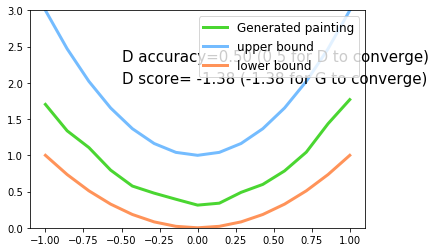

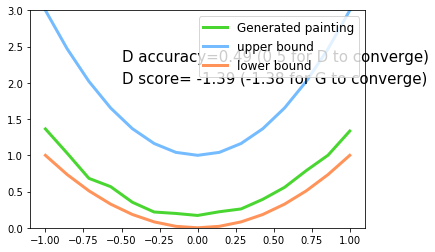

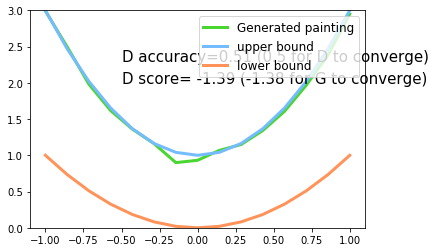

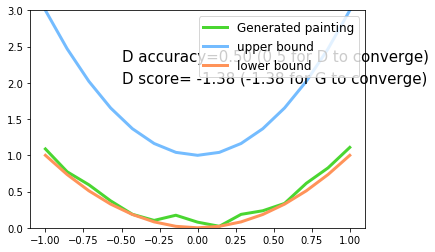

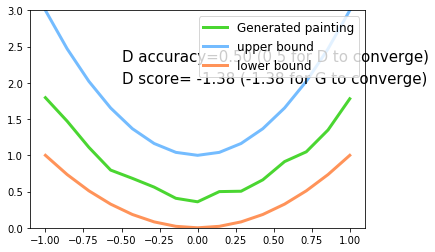

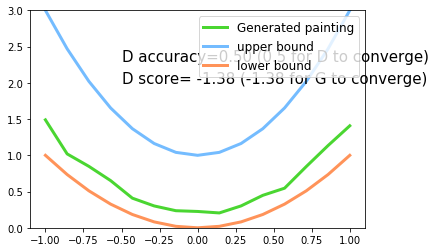

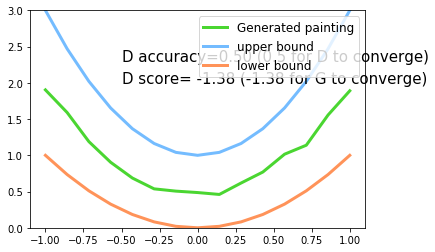

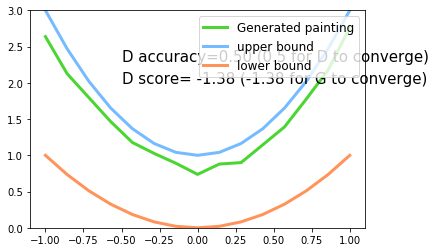

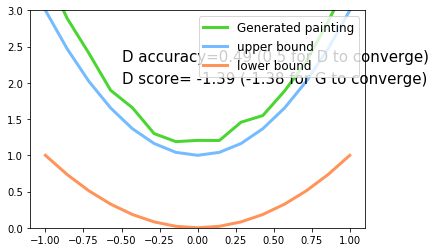

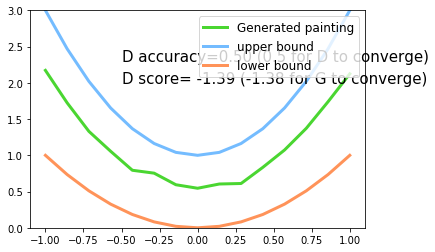

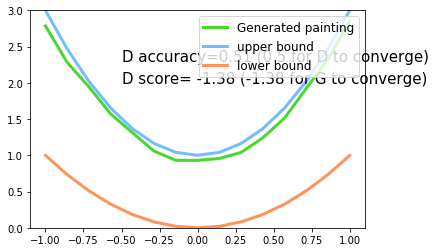

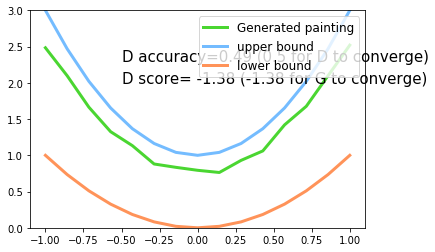

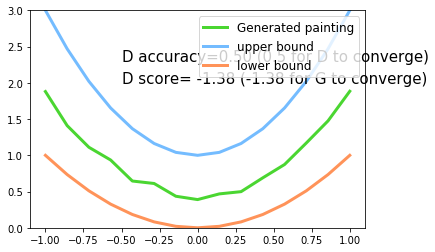

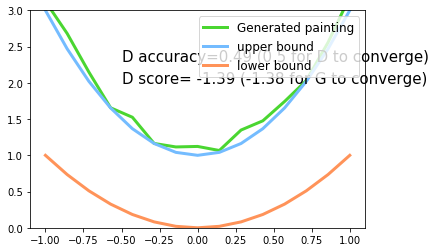

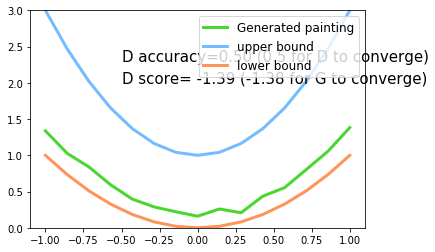

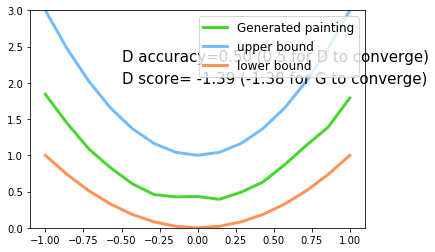

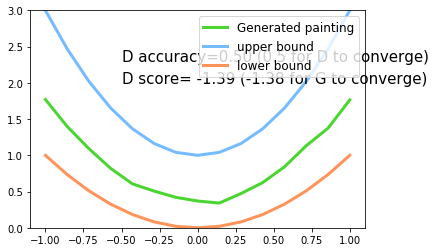

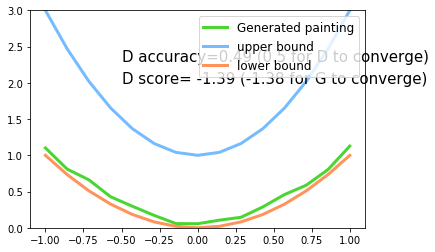

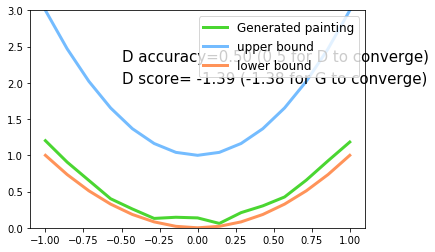

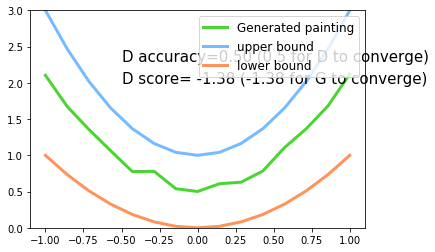

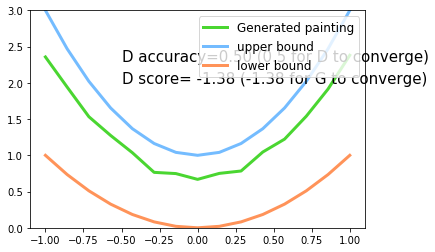

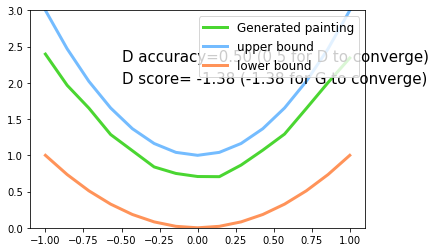

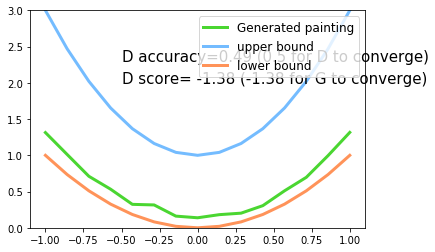

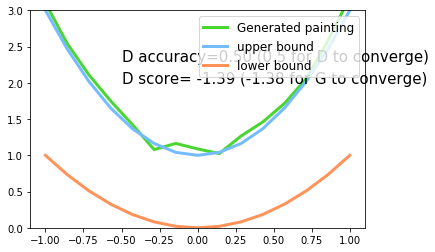

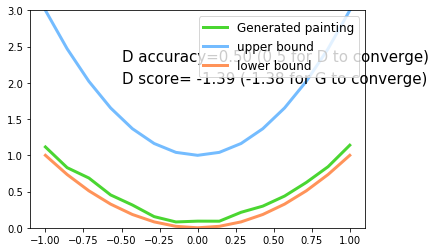

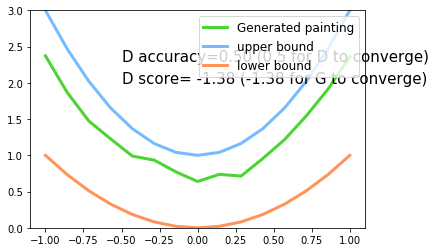

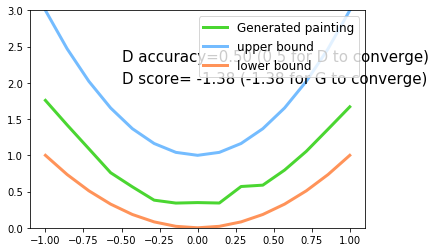

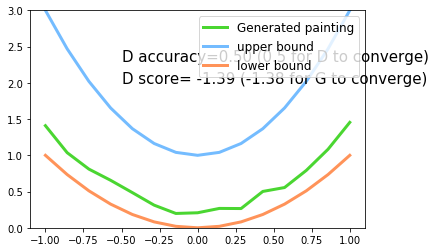

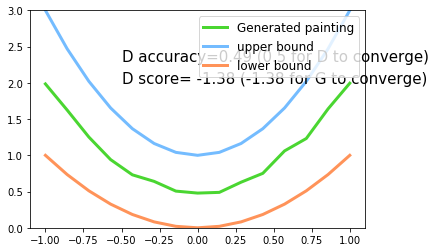

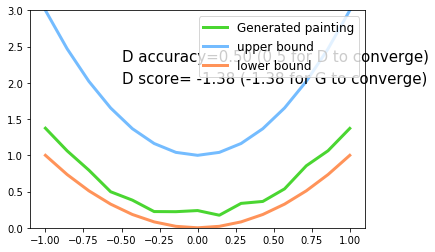

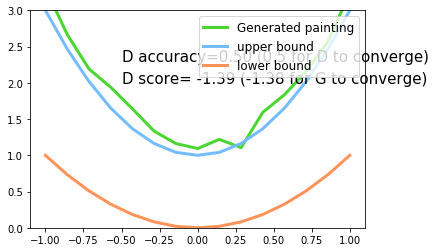

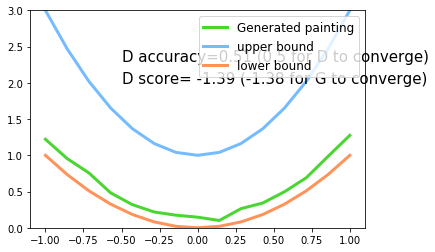

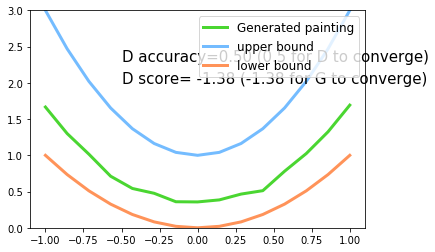

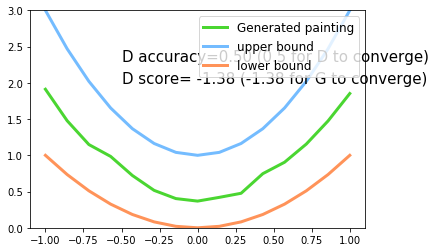

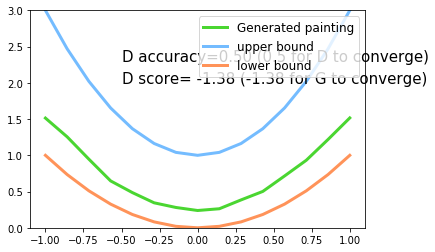

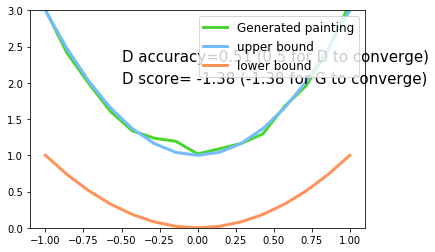

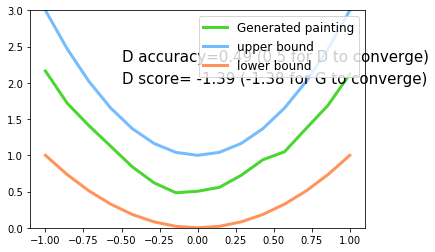

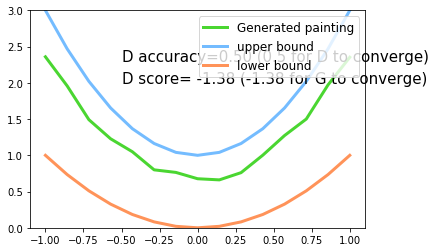

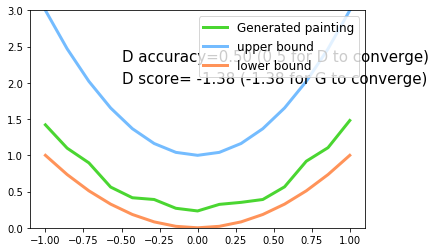

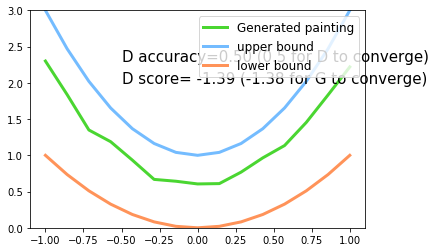

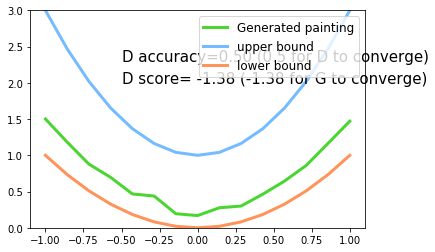

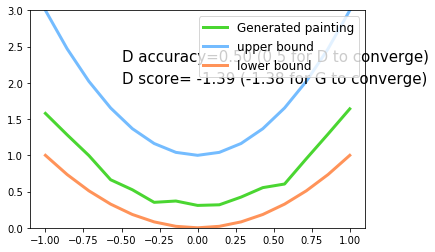

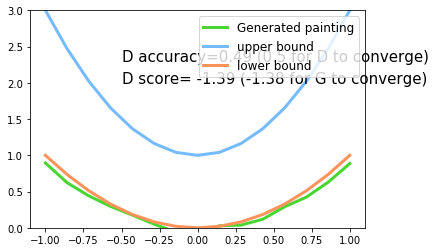

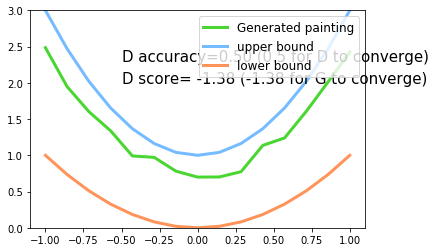

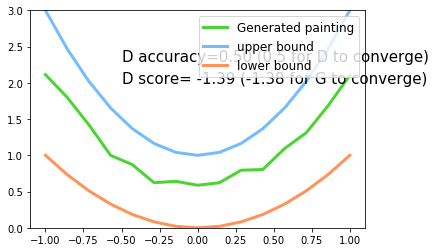

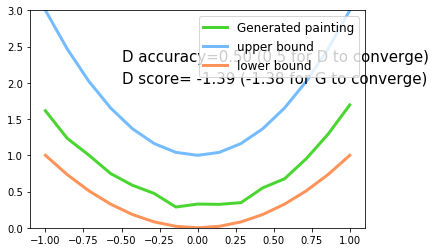

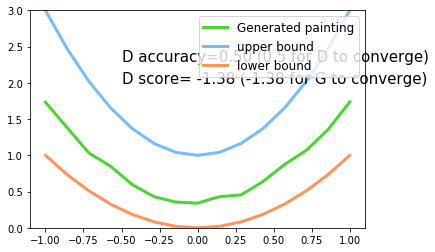

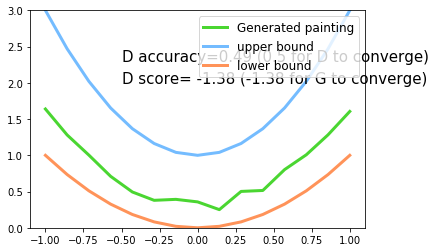

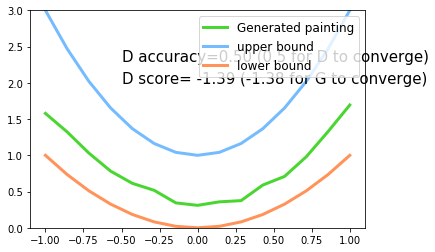

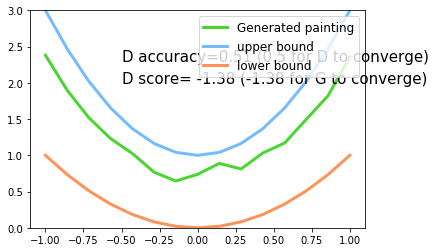

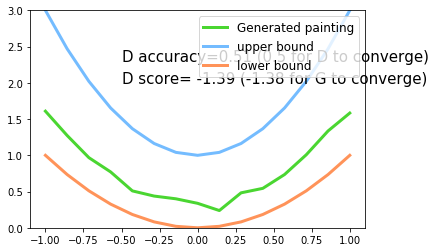

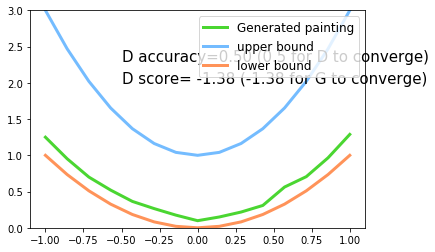

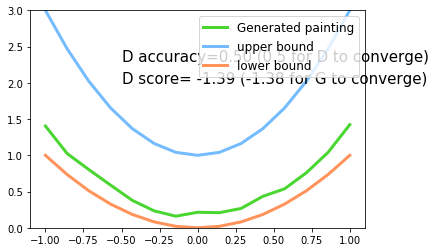

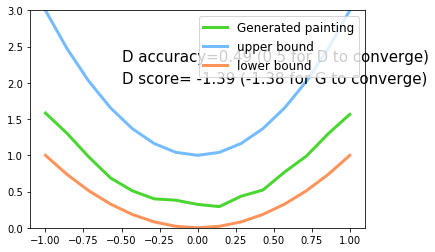

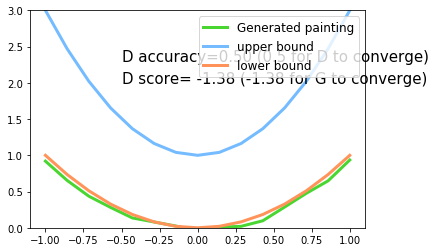

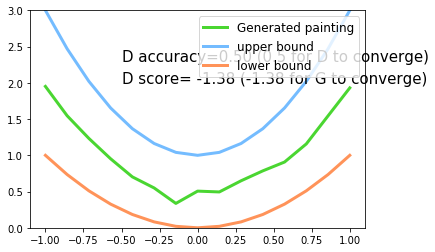

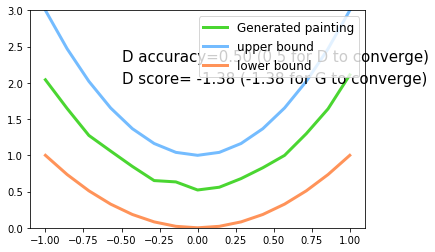

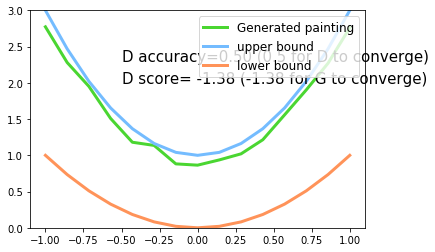

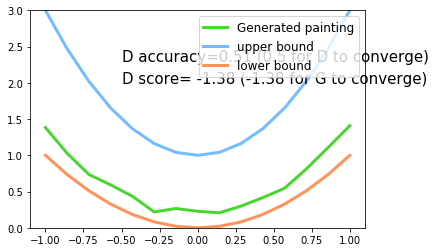

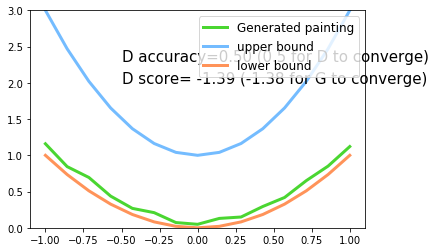

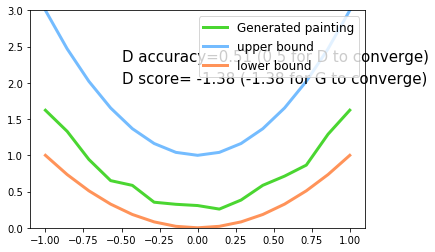

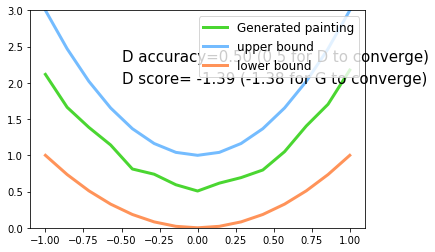

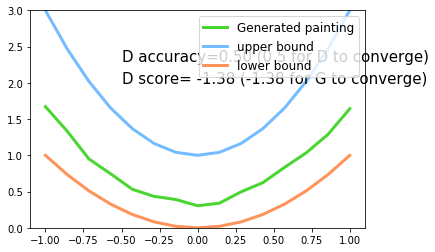

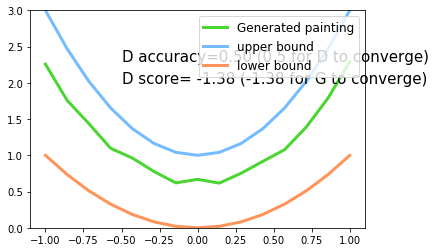

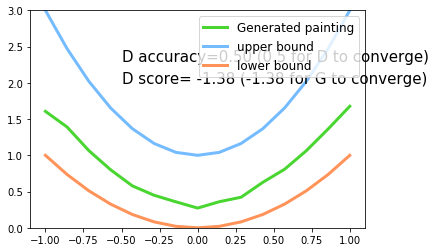

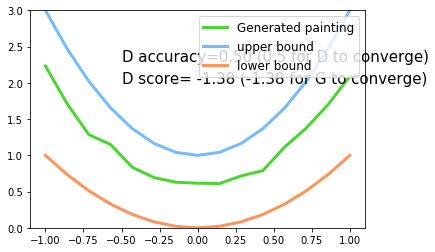

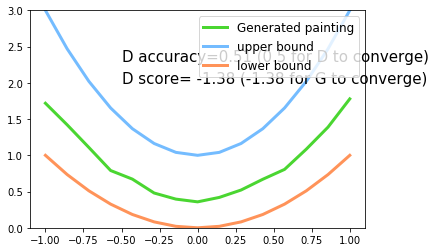

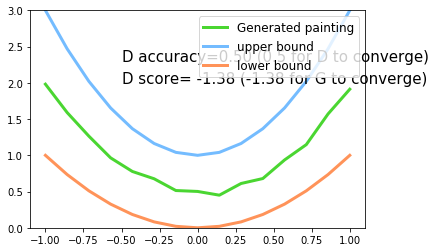

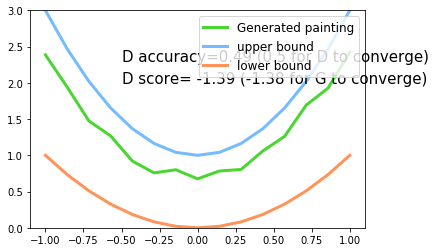

In [21]:
opt_D = torch.optim.Adam(D.parameters(), lr=LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr=LR_G)

for step in range(10000):
    artist_paintings = artist_works()
    G_ideas = Variable(torch.rand(BATCH_SIZE, N_IDEAS))
    G_paintings = G(G_ideas)
    
    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings)
    
    D_loss = -torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True) # retain_variables是为了再次利用计算图，避免计算图中D部分的梯度被释放掉
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    
    if step % 50 == 0:  # plotting
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 15})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 15})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)
        plt.ioff()
        plt.show()


## The tutorial ends here.